## Final Code

In [2]:
# evaluate the deep model on the test dataset
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
from keras.models import load_model
from keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt

In [3]:
# load train and test dataset
def load_dataset():
    # load dataset
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    # building the input vector from the 28x28 pixels
    X_train = X_train.reshape(60000, 784)
    X_test = X_test.reshape(10000, 784)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    
    # normalizing the data to help with the training
    X_train /= 255
    X_test /= 255
    
    return X_train, y_train, X_test, y_test
    

In [4]:
# scale pixels
def prep_pixels(y_train, y_test):
    
    # one-hot encoding using keras' numpy-related utilities
    from keras.utils import np_utils
    n_classes = 10
    Y_train = np_utils.to_categorical(y_train, n_classes)
    Y_test = np_utils.to_categorical(y_test, n_classes)
    
    return Y_train, Y_test

In [5]:
# define cnn model with One hidden Layer
def define_model(af):
    model = keras.Sequential([
    layers.Dense(units=10, input_shape=(784,), activation=af)])
    # compiling the sequential model
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

    return model

In [6]:
# training the model and saving metrics in history
def train_model(af):
    
    # loading the dataset
    X_train, y_train, X_test, y_test = load_dataset()
    
    # scale pixels
    Y_train, Y_test = prep_pixels(y_train,y_test)
    
    # define cnn model with One hidden Layer
    model = define_model(af)
    print('-----------------------------------'+af+'-----------------------------------')
    history = model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=2,
          validation_data=(X_test, Y_test))
    
    return history
    

In [7]:
model_history = {}

In [8]:
def train_AF():
    
    af_list = ['linear','softmax','tanh']
    for i in af_list:
        model_history.update({i:train_model(i)})       
    return model_history   

In [9]:
def remove_nan(dict_obj):
    from math import isnan
    # dict comprehension
    clean_dict = {k: dict_obj[k] for k in dict_obj if not isnan(dict_obj[k])}
    return clean_dict

In [10]:
def get_best_acc_af(af_acc):
    Keymax = max(af_acc, key=af_acc.get)
    return Keymax

In [11]:
def get_best_loss_af(af_loss):
    Keymax = min(af_loss, key=af_loss.get)
    return Keymax

In [12]:
af_accuracy_mean = {}
af_loss_mean = {}
clean_dict_accuracy = {}
clean_dict_loss = {}

In [13]:
def get_best_af():
    from statistics import mean
    model_history = train_AF()
    for x,y in model_history.items():
        af_accuracy_mean.update({x: mean(y.history['accuracy'])})
        af_loss_mean.update({x: mean(y.history['loss'])})
    
    clean_dict_accuracy = remove_nan(af_accuracy_mean)
    clean_dict_loss = remove_nan(af_loss_mean)
    # filter best acc_af
    best_acc_af = get_best_acc_af(clean_dict_accuracy)
    # filter best loss_af
    best_loss_af = get_best_loss_af(clean_dict_loss)
    
    return best_acc_af,best_loss_af
 

In [14]:
def train_final_model():
    acc_af,loss_af = get_best_af()
    history = train_model(loss_af)
    
    
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.legend()
    #plt.show()
    plt.savefig(loss_af+'_Final_LossVal_loss')
    from IPython.display import Image
    Image(filename=loss_af+'_Final_LossVal_loss.png') 
    
    
    # plot the accuracy
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.legend()
    #plt.show()
    plt.savefig(loss_af+'_Final_AccVal_acc')
    from IPython.display import Image
    Image(filename=loss_af+'_Final_AccVal_acc.png') 
    

-----------------------------------linear-----------------------------------
Epoch 1/5
469/469 - 1s - loss: 9.2197 - accuracy: 0.1603 - val_loss: 10.3569 - val_accuracy: 0.1782
Epoch 2/5
469/469 - 1s - loss: 10.1142 - accuracy: 0.1647 - val_loss: 10.4912 - val_accuracy: 0.1919
Epoch 3/5
469/469 - 1s - loss: 9.5793 - accuracy: 0.1700 - val_loss: 9.6229 - val_accuracy: 0.2108
Epoch 4/5
469/469 - 1s - loss: 9.8808 - accuracy: 0.2067 - val_loss: 9.9281 - val_accuracy: 0.2127
Epoch 5/5
469/469 - 1s - loss: nan - accuracy: 0.2010 - val_loss: nan - val_accuracy: 0.0980
-----------------------------------softmax-----------------------------------
Epoch 1/5
469/469 - 1s - loss: 0.6899 - accuracy: 0.8294 - val_loss: 0.3853 - val_accuracy: 0.9027
Epoch 2/5
469/469 - 1s - loss: 0.3645 - accuracy: 0.9023 - val_loss: 0.3194 - val_accuracy: 0.9135
Epoch 3/5
469/469 - 1s - loss: 0.3205 - accuracy: 0.9113 - val_loss: 0.2971 - val_accuracy: 0.9183
Epoch 4/5
469/469 - 1s - loss: 0.3001 - accuracy: 0.9169

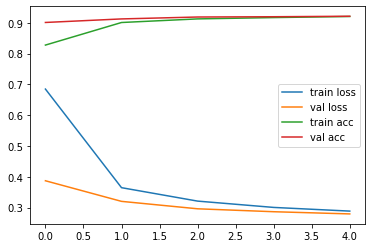

In [15]:
train_final_model()